In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

## There are two files: auto-mpg.names and auto-mpg.data

In [2]:
#for column names and additional information
with open('auto-mpg.names') as f:
    for line in f:
        print(line.strip()) #removed newlines with strip

1. Title: Auto-Mpg Data

2. Sources:
(a) Origin:  This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University. The dataset was
used in the 1983 American Statistical Association Exposition.
(c) Date: July 7, 1993

3. Past Usage:
-  See 2b (above)
-  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
In Proceedings on the Tenth International Conference of Machine
Learning, 236-243, University of Massachusetts, Amherst. Morgan
Kaufmann.

4. Relevant Information:

This dataset is a slightly modified version of the dataset provided in
the StatLib library.  In line with the use by Ross Quinlan (1993) in
predicting the attribute "mpg", 8 of the original instances were removed
because they had unknown values for the "mpg" attribute.  The original
dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon,
to be predicted in terms of 3 multivalued discrete and 5 continuou

In [3]:
a = [1,2,3,4,5,6,7,8]
a[::3]

[1, 4, 7]

In [4]:
#showing all steps that might be involved in extracting the attribute names, 
names = []
with open('auto-mpg.names') as f:
    names = f.read().split('Attribute Information:')[1] #after 7.
    names = names.split('8. Missing')[0] #before 8.
    # add : to end of line and after numbers, then we know every 2nd of 3 is a name
    names = names.strip().replace('\n', ':').replace('.', ':')
    names = names.split(':')[1::3] #start at the second value, go by 3
print(names)

#remove the whitespace at the beginning of each name
names = [name.strip() for name in names]
print(names)

[' mpg', ' cylinders', ' displacement', ' horsepower', ' weight', ' acceleration', ' model year', ' origin', ' car name']
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


In [5]:
#read first line of data
with open('auto-mpg.data','r') as f:
    print(f.readline())

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"



# Data Cleaning
***

In [6]:
#pre-process the data to a format to easily create a dataframe
cars = []

with open('auto-mpg.data', 'r') as f:
    for line in f:
        #strip the \n, remove the quotes from the car name 
        #split the data on tabs or whitespace, but limit split to the 8th item to avoid splitting car name by space
        data = line.strip().replace('"', '').split(maxsplit = 8)
        cars.append(data)

In [7]:
#Create our dataframe named Autos
Autos = pd.DataFrame(data=cars,columns = names)#.astype(float, errors = 'ignore')
#at this point the data are objects, not numbers. Optionally set car name as index column
Autos = Autos.apply(pd.to_numeric, errors = 'ignore') #If I used coerce here, then car names will become NaN

#missing 8 data points in horsepower column filled as '?', ignore errors while converting to numeric
Autos['horsepower'] = pd.to_numeric(Autos['horsepower'], errors = 'coerce') #coerce all missing data '?' to NaN
Autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Exploratory Data Analysis
***

In [8]:
Autos.info()
Autos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


A correlation matrix shows the strength of the linear relationship between each pair of variables.
-1 is negative correlation (as one increases, the other decreases).
0 is no correlation (the variables are not associated).
1 is positive correlation (associated).
This does not imply causation, just their relation. Another unseen variable might increase both.

[Text(0.5, 0, 'mpg'),
 Text(1.5, 0, 'cylinders'),
 Text(2.5, 0, 'displacement'),
 Text(3.5, 0, 'horsepower'),
 Text(4.5, 0, 'weight'),
 Text(5.5, 0, 'acceleration'),
 Text(6.5, 0, 'model year'),
 Text(7.5, 0, 'origin')]

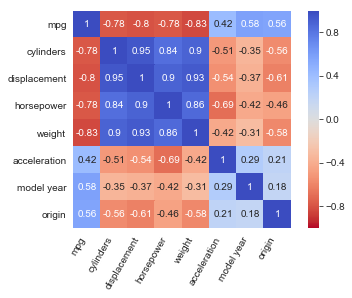

In [9]:
#Pearson method, excludes null values
ax = sns.heatmap(Autos.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm_r',square=True, annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60, horizontalalignment='right')

Column pairs are well correlated in dark blue (positively) and dark red (negatively); light blue and red show low correlation, or a random distribution.
From this I can see that mpg is negatively correlated with cylinders, displacement, horsepower and weight, 
but fairly positively correlated with acceleration, model year, and origin.

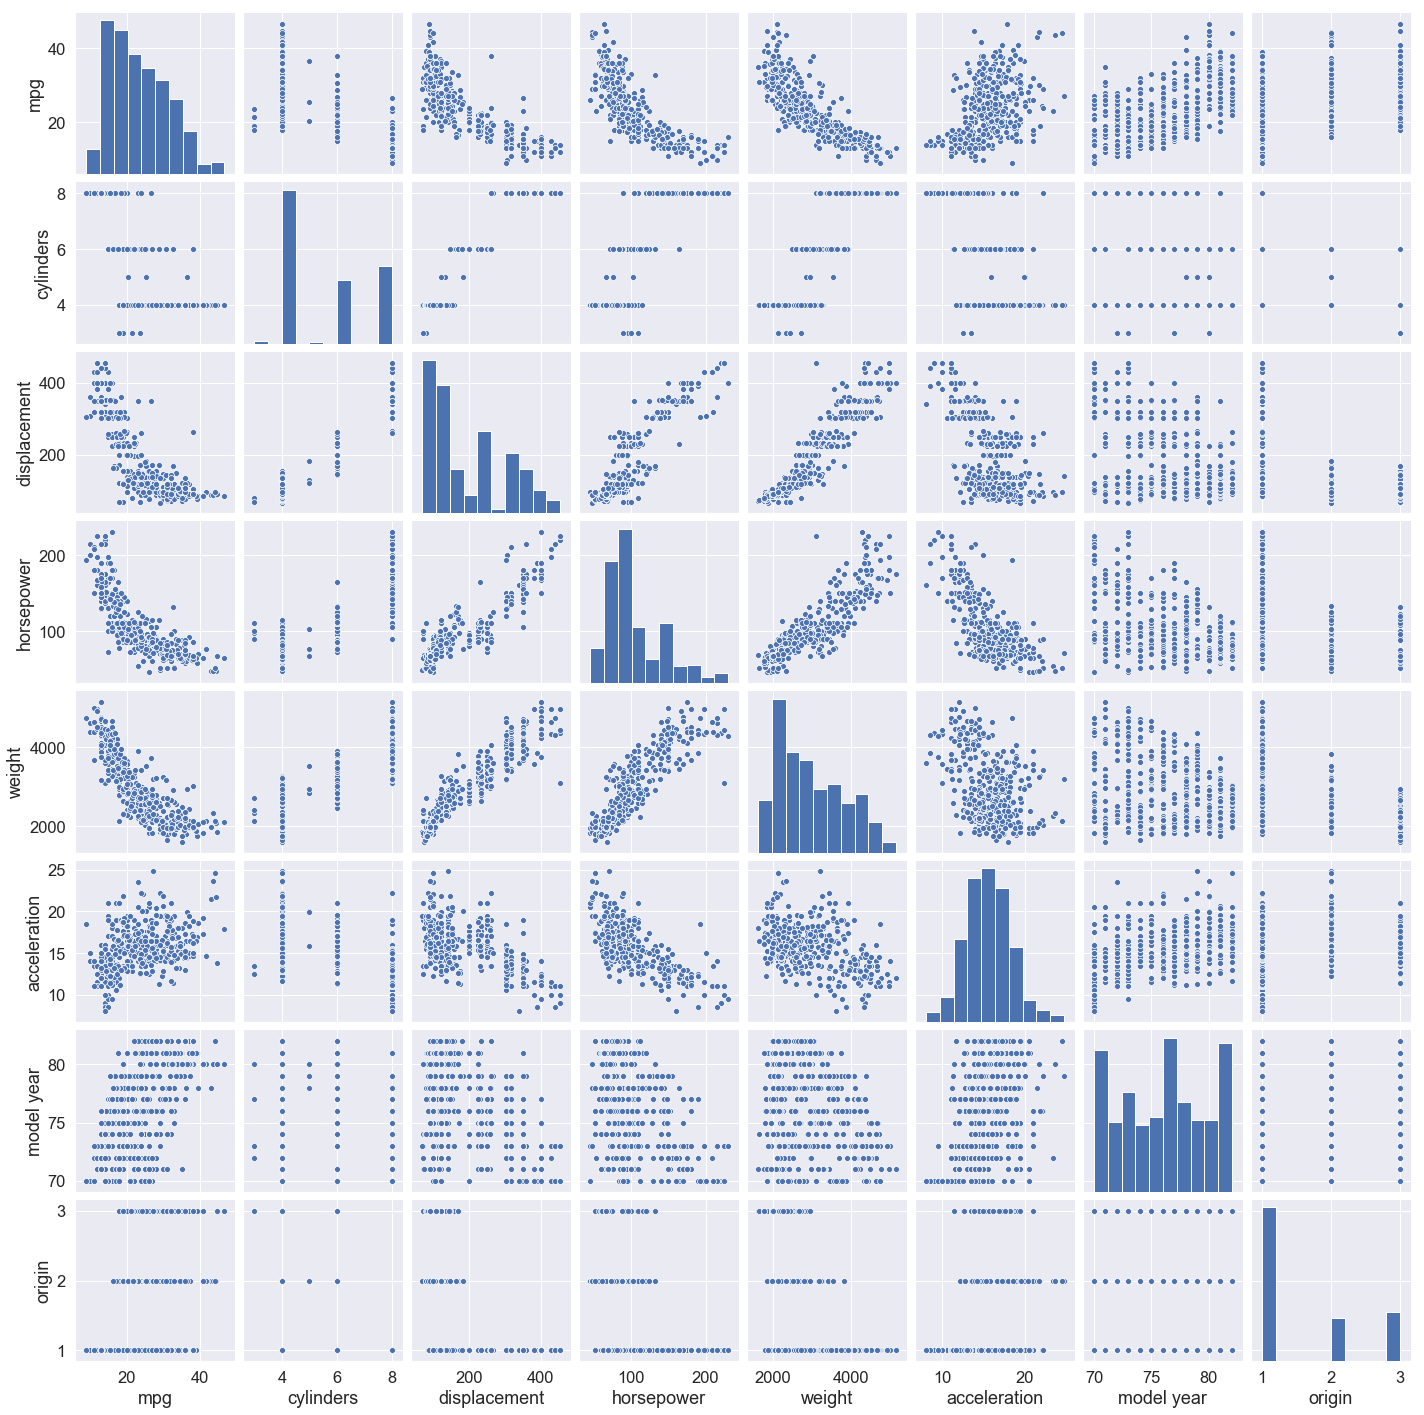

In [24]:
# This makes scatter plots for each variable pair, and shows histograms when plotted against itself
sns.set(font_scale = 1.5)
ax = sns.pairplot(Autos)
ax.fig.subplots_adjust(hspace=.05, wspace=.05)
#correlation here is easy to see as well

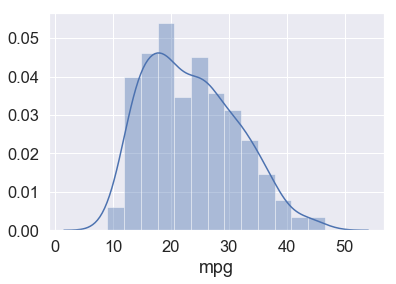

In [26]:
sns.set_style('darkgrid')
ax = sns.distplot(Autos['mpg'])

In [12]:
#How does the origin affect the average of all other columns?
Autos.groupby('origin').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
origin,,,,,,,
1,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442
2,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
3,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038


The origin greatly influences the mpg and other correlated columns. Grouping by year also shows a increase in mpg over time.

# Machine Learning
***

## Regression

In [13]:
Autos.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [14]:
#Let's predict the mpg from the other variables by using regression
#since there are only 6 missing values in horsepower, I will drop these rows from the dataframe
X = Autos[['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin']].dropna()
y = Autos['mpg'][Autos['horsepower'].isnull() == False] #select mpg where horsepower is not missing

I am using both continuous and discrete variables in the model

Split data into training and test sets, train the model onto the training set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Evaluation
***
Interpret coefficients, make predictions on the test set, see how well the model performed

In [17]:
print(lm.intercept_)

-22.127489314656444


In [18]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cylinders,-0.393755
displacement,0.016767
horsepower,0.003355
weight,-0.007101
acceleration,0.173854
model year,0.796421
origin,1.288426


The coefficients show how each variable affects the mpg. For example: By holding every other value fixed, the trend shows that a one unit increase in acceleration increases the mpg value by 0.17. The equation may be described as (using the initials of the column names as variables):
mpg = - 0.394c + 0.017d + 0.003h - 0.007w + 0.174a + 0.796my + 1.29o - 22.1

In [19]:
predictions = lm.predict(X_test)

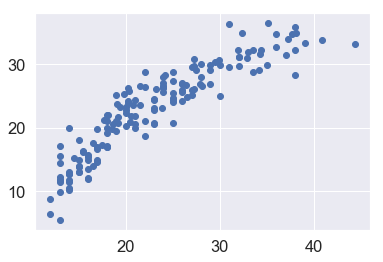

In [20]:
plt.scatter(y_test, predictions)

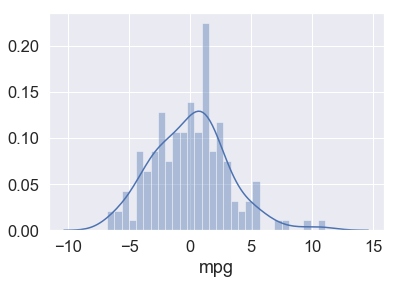

In [27]:
ax = sns.distplot((y_test-predictions),bins = 30)# residual histogram, looks mostly normally distributed

In [22]:
#regression metric
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2 Score:', metrics.r2_score(y_test, predictions))

MAE: 2.417810764807423
MSE: 9.508937470891693
RMSE: 3.0836565098745505
R^2 Score: 0.8258125425183535


Typically for linear regression we use the root mean square error and R^2 as metrics for the model accuracy.
On average the residuals have an error of about 3 mpg, the predictions fit the data with about 83% accuracy. This is a bit low, because a linear fit might not be the best model due to low correlation between mpg and the discrete columns.